In [10]:
pip install folium

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [11]:
pip install folium --upgrade

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [21]:
'''#--------IMPORTAR EL DATASET DE CONTAMINACION DE LOS PAISES "KAGGLE"'''
with open('contaminacion_mundial.txt', 'r') as file:
    lines = file.readlines()
    
solo_paises = []
paises_contaminacion = []

#sacar los datos del dataset y ponerlo en una lista
for line in lines:
    elements = line.strip().split(',') #ejecutar elementos
    
    columna = elements[0], elements[1], elements[2], elements[4], elements[6], elements[8], elements[10]
    paises_contaminacion.append(columna) #guardar todos los datos por ciudad con nombres y datos
    solo_paises.append(elements[0])  #Guardar solo el nombre del pais en otra lista


In [18]:
'''#--------ESCOJER PAIS'''
#Ver todos los paises para escojer uno y mostrarlo en el mapa...
conjunto_sin_repetidos = set(solo_paises)
paises_sin_repetidos = list(conjunto_sin_repetidos)
print("Escoje un pais e introduce el nombre abajo del todo:")

for pais in paises_sin_repetidos:
    print(pais)

pais_pedido = input()

print("/n el pais pedido es:", pais_pedido)

Escoje un pais e introduce el nombre abajo del todo:

Sweden
Ukraine
Argentina
Latvia
Netherlands
Guinea
Iraq
Nepal
Guinea-Bissau
Cuba
Egypt
Tajikistan
Mozambique
Cyprus
Dominican Republic
Liberia
Democratic Republic of the Congo
Iran (Islamic Republic of)
Cambodia
Congo
Lebanon
Ghana
Bolivia (Plurinational State of)
Panama
Chad
Brazil
Uzbekistan
Saint Kitts and Nevis
Armenia
Slovenia
Madagascar
Croatia
Mauritius
Bulgaria
Togo
Qatar
Kyrgyzstan
Jamaica
Libya
Kuwait
Australia
Jordan
Republic of Korea
Haiti
Somalia
Myanmar
Bhutan
United Kingdom of Great Britain and Northern Ireland
China
Oman
Philippines
France
Sierra Leone
United Arab Emirates
Tunisia
Honduras
Venezuela (Bolivarian Republic of)
Peru
Lesotho
Turkey
Angola
Cabo Verde
Belgium
Belarus
Luxembourg
Malawi
Spain
Sri Lanka
Singapore
Morocco
Comoros
Poland
Barbados
Sudan
Botswana
Algeria
Azerbaijan
Namibia
Cameroon
Saudi Arabia
Gabon
Ireland
Hungary
Indonesia
CÃ´te d'Ivoire
Denmark
Paraguay
Lao People's Democratic Republic
Montene

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

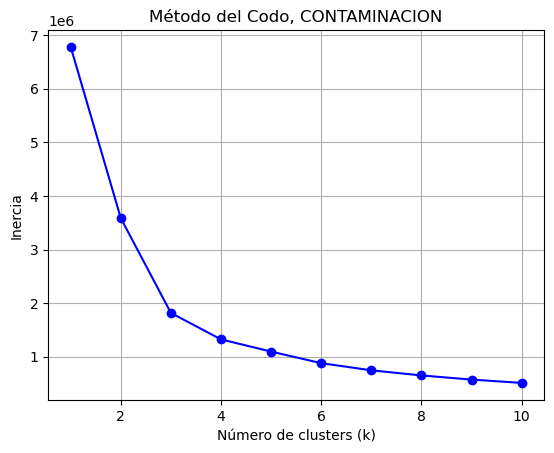

como podemos ver en la imagen hay 3 clusteres, ya que el codo esta en 3


In [36]:
'''#--------TECNICA DEL CODO '''
#convertir lista a array de numpy DEL PAIS ELEJIDO
import numpy as np

pais_seleccionado = []
solo_datos = []

for pais in paises_contaminacion:
        if pais[0] == pais_pedido:
            pais_seleccionado.append(pais) #Aqui guardar todas las ciudades solo del pais con sus datos
            
            #AQUI GUARDAR SOLO LOS DATOS DE LAS CIUDADES, SIN LOS NOMBRES
            columna = pais[2], pais[3], pais[4], pais[5], pais[6]
            solo_datos.append(columna)
            
            
#Convertir lista a array de numpy
import numpy as np
X_contaminacion = np.array(solo_datos)

#1.1. HACER LA TECNICA DEL CODO PARA DETECTAR CLUSTERES --HACERLO DE EL PAIS SELECCIONADO
from sklearn.cluster import KMeans
n_clusters = range(1, 11)  
n_iter = 100
tol = 1e-3
inertia = []

# Itera sobre el nº de clústeres
for n_c in n_clusters:
    kmeans = KMeans(n_clusters=n_c, random_state=0) 
    kmeans.fit(X_contaminacion)
    inertia.append(kmeans.inertia_)

#mostrar en una grafica el codo
import matplotlib.pyplot as plt
# Graficar la curva del codo
plt.plot(range(1, 11), inertia, marker='o', linestyle='-', color='b')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del Codo, CONTAMINACION')
plt.grid(True)
plt.show()


print("como podemos ver en la imagen hay 3 clusteres, ya que el codo esta en 3")
n_clusters = 3


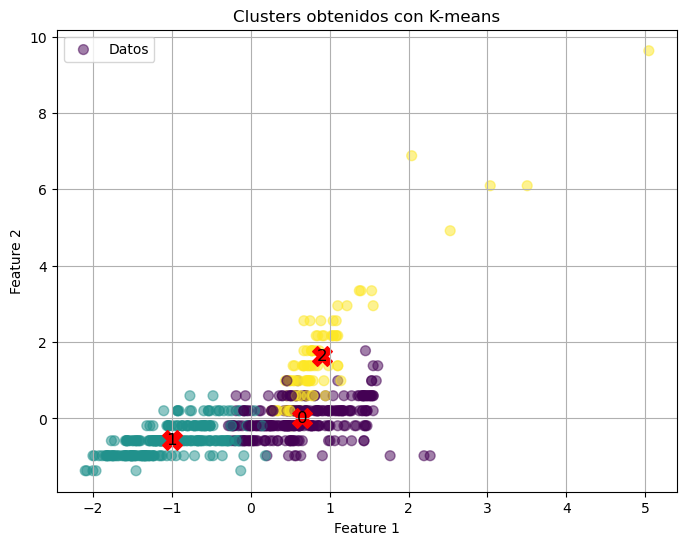

In [38]:
'''#--------EJECUTAR K-MEANS'''

#REORDENAR LOS DATOS ALEATORIAMENTE SI ES NECESSARIO
np.random.seed(42)  
indices = np.arange(len(X_contaminacion))
np.random.shuffle(indices)
X = X_contaminacion[indices]

#DIVIDIR EN ENTRENAMINETO Y TEST
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

#NORMALIZAR
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

#CALCULAR K-MEANS
n_iter = 100
tol = 1e-3

#1.2. AVERIGUAR LOS CENTROIDES PARA REALIZAR K-MEANS
import numpy as np
#X_contaminacion = X_contaminacion.astype(float)
#centroides = centroides.astype(float)

def dist_examples(x, centroide):
    dist = np.linalg.norm(x - centroide)
    return dist #distancia entre los grupos de los centroides


inicializaciones = 10
resultados = []
guardar_centroides = []       #lista para guardar todos los centroides
#inicializar cada modelo "inicializacion"
for inicializacion in range(inicializaciones):
#hacer centroides aleatorios
    np.random.shuffle(X_train)
    centroides = X_train[:n_clusters, :]
#CALCULAR CENTROIDES MAS APTOS
    guardar_centroides.append(centroides)
for i in range(n_iter):
        cluster_asignado_ejemplos = np.zeros(len(X_train), dtype=int)

        for i, x in enumerate(X_train):
                distancias = [dist_examples(x, c) for c in centroides]
                cluster_asignado_ejemplos[i] = np.argmin(distancias)

        for c in range(n_clusters):
                puntos_cluster = X_train[cluster_asignado_ejemplos == c]
                centroides[c] = np.mean(puntos_cluster, axis=0)

        if np.all(np.abs(centroides - np.mean(X_train, axis=0)) < tol):
                #print('Inicialización', inicializacion, '- Modelo converge en iteración nº:', i)
                break
        else:
                #print('Inicialización', inicializacion, '- Nº máx. de iteraciones alcanzado')
                resultados.append((centroides, cluster_asignado_ejemplos))

           
#GRAFICA PARA VER LOS CENTROIDES MAS APTOS
#MOSTRAR UNA GRAFICA PARA VER LOS CENTROIDES CON SU NUMERO

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=cluster_asignado_ejemplos, cmap='viridis', s=50, alpha=0.5, label='Datos')
for i, centroid in enumerate(centroides):
    plt.scatter(centroid[0], centroid[1], c='red', s=200, marker='X')
    plt.text(centroid[0], centroid[1], str(i), color='black', fontsize=12, ha='center', va='center')
plt.title('Clusters obtenidos con K-means')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()


In [68]:
'''#--------MOSTRAR LAS CIUDADES CON SUS GRUPOS CALCULADOS ANTERIORMENTE'''
#MOSTRAR LAS CIUDADES SEGUN SU GRUPO
#guardar el nombre de la ciudad con su grupo en una lista
print("aqui veriamos cada ciudad con su grupo")
ciudad_grupo = [] #lista en la que guardar nombre y grupo

for i, x in enumerate(X_train):
    distancias = [dist_examples(x, c) for c in centroides]
    cluster_asignado_ejemplos[i] = np.argmin(distancias)
    
    #sacar ciudad
    ciudad = pais_seleccionado[i][1]
    #guardar el grupo
    grupo = np.argmin(distancias)
    
    dato1 = pais_seleccionado[i][2]
    dato2 = pais_seleccionado[i][3]
    dato3 = pais_seleccionado[i][4]
    dato4 = pais_seleccionado[i][5]
    dato5 = pais_seleccionado[i][6]
    ciudad_grupo.append([ciudad, grupo, dato1, dato2, dato3, dato4, dato5])
    #guardar nombre ciudad y grupo a la lista

    #columna = [paises_contaminacion[i], np.argmin(distancias)] #guardar nombre y grupo 

#itinerar en la lista ciudad_grupo "grupos", y mostrar el nombre de ciudades y datos con "ciudad"
for ciudad in ciudad_grupo:
    if ciudad[1] == 0:
        print(ciudad[0], ciudad[2], ciudad[3], ciudad[4], ciudad[5], ciudad[6], "grupo 0")
for ciudad in ciudad_grupo:
    if ciudad[1] == 1:
        print(ciudad[0], ciudad[2], ciudad[3], ciudad[4], ciudad[5], ciudad[6], "grupo 1")
for ciudad in ciudad_grupo:
    if ciudad[1] == 2:
        print(ciudad[0], ciudad[2], ciudad[3], ciudad[4], ciudad[5], ciudad[6], "grupo 2")

aqui veriamos cada ciudad con su grupo
Qinzhou 68 2 68 1 58 grupo 0
Xiangdong 78 2 25 7 78 grupo 0
Xushan 112 2 44 4 112 grupo 0
Huaicheng 151 4 45 4 151 grupo 0
Yuanping 143 2 35 5 143 grupo 0
Zhaozhou 73 2 66 0 73 grupo 0
Zhongshan 98 3 33 9 98 grupo 0
Anqiu 107 2 107 5 86 grupo 0
Chaoyang 151 3 119 1 151 grupo 0
Panshi 76 3 32 2 76 grupo 0
Panzhihua 74 3 29 2 74 grupo 0
Guilin 90 3 46 3 90 grupo 0
Lasa 25 0 25 0 12 grupo 0
Lishan 192 4 192 6 124 grupo 0
Jijiang 162 10 79 25 162 grupo 0
Kangshan 201 3 201 4 142 grupo 0
Korla 160 1 45 0 160 grupo 0
Liancheng 58 1 28 2 58 grupo 0
Matou 111 2 42 8 111 grupo 0
Guiyang 99 3 41 6 99 grupo 0
Hongan 129 3 129 3 78 grupo 0
Houlung 62 1 56 4 62 grupo 0
Mujiayingzi 62 1 47 0 62 grupo 0
Nehe 39 1 39 0 18 grupo 0
Pingyi 151 3 151 2 97 grupo 0
Peitou 62 2 49 7 62 grupo 0
Pengcheng 200 5 200 7 163 grupo 0
Donghai 159 3 159 1 79 grupo 0
Xianshuigu 123 4 89 14 123 grupo 0
Chengde 99 2 70 1 99 grupo 0
Duobao 137 3 137 1 96 grupo 0
Bozhou 162 8 44 24 1

In [1]:
'''#--------MOSTRAR LAS CIUDADES EN EL MAPA DEL PAIS ESCOJIDO'''
print(ciudad_grupo)
#1.MOSTRAR LAS CORDENADAS DEL PAIS QUE ESCOJIMOS
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="my_geocoder")
location = geolocator.geocode(pais_pedido)
if location:
    print(pais_pedido, "latitud: ", location.latitude, "longitud:", location.longitude)
else:
    print(f"No se encontró la ubicación de el pais {pais_pedido}")

    
#2. AGREGAR LA IMAGEN DEL MAPA DEL PAIS
import os
import folium
from IPython.display import IFrame
from IPython.display import IFrame, display


m = folium.Map(location=[location.latitude, location.longitude], zoom_start=4)


#3. AGREGAR A LA IMAGEN LAS CIUDADES CON SU COLOR
for i in range(len(ciudad_grupo)):
#for ciudad in lista_ciudades:
    #AVERIGUAR LA LOCALIZACION DE LA CIUDAD
    geolocator = Nominatim(user_agent="my_geocoder")
    nombreciudad = pais_pedido, ciudad_grupo[i][0]
    location = geolocator.geocode(nombreciudad)
    if location:
        #MOSTRAR LAS ZONAS EVALUADAS CON DIFERENTES COLORES, mostrar las diferentes ciudades...
        #GRUPO 0 = VERDE
        #GRUPO 1 = AZUL
        #GRUPO 2 = ROJO

        if ciudad_grupo[i][1] == 0:
            folium.Marker(location=[location.latitude, location.longitude], popup='map', icon=folium.Icon(color='purple')).add_to(m)
        if ciudad_grupo[i][1] == 1:
            folium.Marker(location=[location.latitude, location.longitude], popup='map', icon=folium.Icon(color='blue')).add_to(m)
        if ciudad_grupo[i][1] == 2:
            folium.Marker(location=[location.latitude, location.longitude], popup='map', icon=folium.Icon(color='yellow')).add_to(m)

    else:
        print("no hay cordenadas de la ciudad: ", nombreciudad)


#MOSTRAR LAS ZONAS EVALUADAS CON DIFERENTES COLORES, mostrar las diferentes ciudades...
#GRUPO 0 = VERDE
#GRUPO 1 = AZUL
#GRUPO 2 = ROJO

m.save('mapa.html')

mapa_iframe = IFrame(src='mapa.html', width=700, height=600)
display(mapa_iframe)




NameError: name 'ciudad_grupo' is not defined

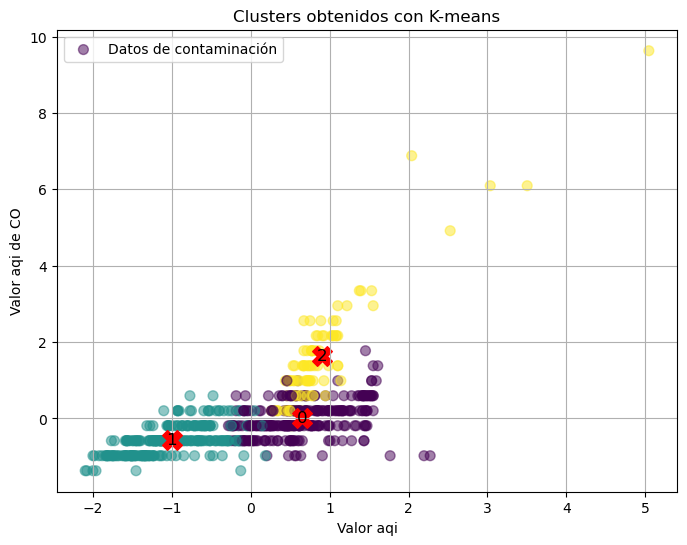

In [73]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

# Graficar los datos de contaminación con colores según el grupo asignado por k-means
plt.scatter(X_train[:, 0], X_train[:, 1], c=cluster_asignado_ejemplos, cmap='viridis', s=50, alpha=0.5, label='Datos de contaminación')

# Graficar los centroides de los grupos k-means
for i, centroid in enumerate(centroides):
    plt.scatter(centroid[0], centroid[1], c='red', s=200, marker='X')
    plt.text(centroid[0], centroid[1], str(i), color='black', fontsize=12, ha='center', va='center')

plt.title('Clusters obtenidos con K-means')
plt.xlabel('Valor aqi')
plt.ylabel('Valor aqi de CO')
plt.legend()
plt.grid(True)
plt.show()